In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np

In [2]:
base_full = pd.read_csv('C:\\Users\\flavi\\Google Drive\\Estudos\\Formação em Data Science\\Agrupamento\\Bases\\Mall_Customers.csv')
base_full.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [3]:
base_full.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

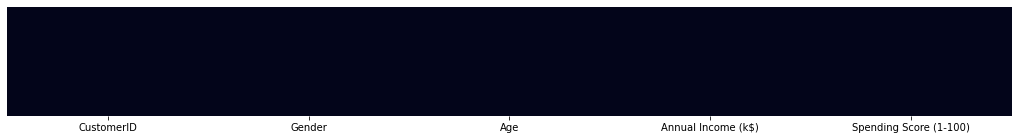

In [4]:
plt.figure(figsize=(18,2))
sns.heatmap(base_full.isnull(), cbar=False, yticklabels=False);

In [5]:
base_full.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
def standarscaler(df, lista):
    stderscaler = StandardScaler()
    for item in lista:
        df[[item]] = stderscaler.fit_transform(df[[item]])
    return df

In [7]:
lista = ['Age','Annual Income (k$)','Spending Score (1-100)']
df_result_StandScaler = standarscaler(base_full,lista)
le = LabelEncoder()
df_result_StandScaler['Gender'] = le.fit_transform(df_result_StandScaler['Gender'].values)
df_result_StandScaler.head()

CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1       1 -1.424569           -1.738999               -0.434801
1           2       1 -1.281035           -1.738999                1.195704
2           3       0 -1.352802           -1.700830               -1.715913
3           4       0 -1.137502           -1.700830                1.040418
4           5       0 -0.563369           -1.662660               -0.395980

In [8]:
df_result_StandScaler.describe()

CustomerID      Gender           Age  Annual Income (k$)  \
count  200.000000  200.000000  2.000000e+02        2.000000e+02   
mean   100.500000    0.440000 -9.603429e-17       -6.128431e-16   
std     57.879185    0.497633  1.002509e+00        1.002509e+00   
min      1.000000    0.000000 -1.496335e+00       -1.738999e+00   
25%     50.750000    0.000000 -7.248436e-01       -7.275093e-01   
50%    100.500000    0.000000 -2.045351e-01        3.587926e-02   
75%    150.250000    1.000000  7.284319e-01        6.656748e-01   
max    200.000000    1.000000  2.235532e+00        2.917671e+00   

       Spending Score (1-100)  
count            2.000000e+02  
mean            -1.121325e-16  
std              1.002509e+00  
min             -1.910021e+00  
25%             -5.997931e-01  
50%             -7.764312e-03  
75%              8.851316e-01  
max              1.894492e+00

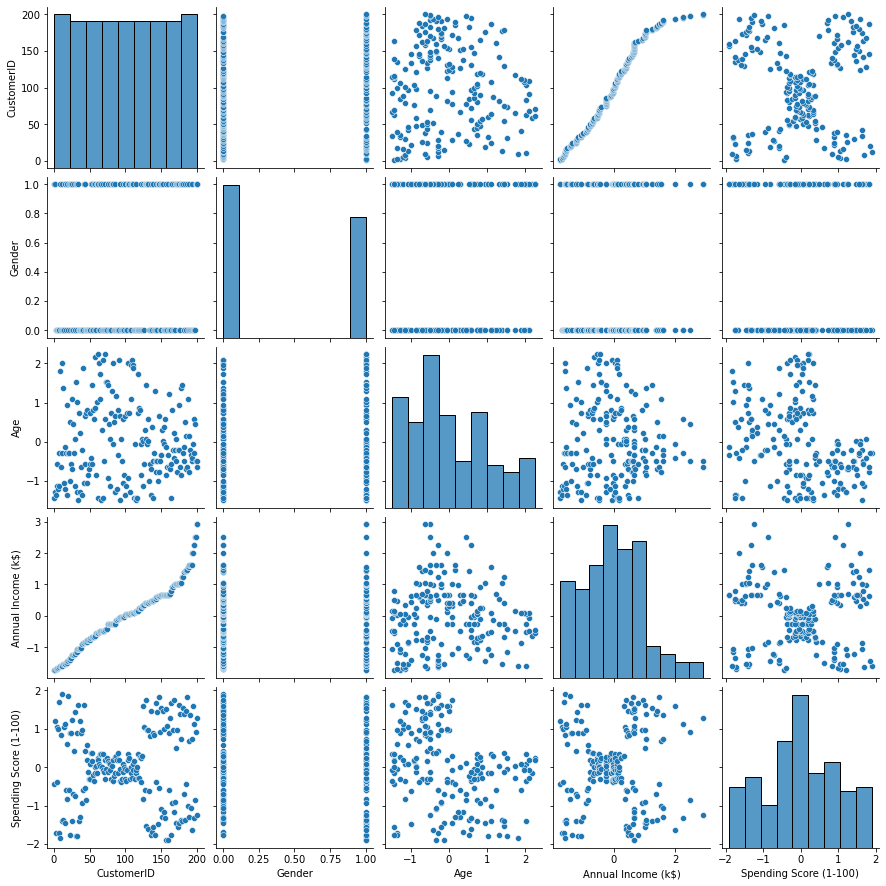

In [9]:
sns.pairplot(df_result_StandScaler)
plt.show()

In [11]:
sns.heatmap(df_result_StandScaler.corr())
plt.show()

In [12]:
minPnts = 2 * 3

from sklearn.neighbors import NearestNeighbors
NN = NearestNeighbors(minPnts).fit(df_result_StandScaler.iloc[:,2:])
dist, idx = NN.kneighbors(df_result_StandScaler.iloc[:,2:])
avg_dist=[d.mean() for d in dist]
avg_dist.sort(reverse= True)
plt.plot(list(range(1,df_result_StandScaler.shape[0]+1)), avg_dist)
plt.axhline(y=0.5, color = 'r', linestyle = '--')

C:\Users\flavi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [257]:
dbscan_model =  DBSCAN(eps=0.5, min_samples=minPnts)
dbscan_model.fit(df_result_StandScaler.iloc[:,2:])

DBSCAN(min_samples=6)

In [258]:
dbscan_model.get_params(deep=True)

{'algorithm': 'auto',
 'eps': 0.5,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 6,
 'n_jobs': None,
 'p': None}

In [259]:
labels = dbscan_model.labels_
labels

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0,  1, -1, -1,  0, -1,  0, -1,  0,
       -1,  0, -1, -1, -1,  0, -1,  0,  1,  2,  1, -1,  1,  2,  2,  2,  1,
        2,  2,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  2,  1,  1,
        2,  2,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  2,
        1,  1,  2, -1,  1,  1,  2,  1,  1,  2,  2,  1,  2,  1,  2,  2,  1,
        1,  2,  1,  2,  1,  1,  1,  1,  1,  2,  1,  2,  2,  2,  1,  1,  1,
        1,  2, -1, -1,  3, -1,  3, -1,  3, -1,  3,  4,  3,  2,  3, -1,  3,
        4,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3,  4,  3,  4,
        3,  4,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3,  4,  3, -1, -1,
        4,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,
       -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [260]:
n_noise_ = list(labels).count(-1)
n_noise_

66

In [261]:
sample_cores=np.zeros_like(labels,dtype=bool)
sample_cores[dbscan_model.core_sample_indices_]=True
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

5

In [262]:
df_result_StandScaler['labels'] =  dbscan_model.labels_
df_result_StandScaler.head()

CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1 -1.424569           -1.738999               -0.434801   
1           2       1 -1.281035           -1.738999                1.195704   
2           3       0 -1.352802           -1.700830               -1.715913   
3           4       0 -1.137502           -1.700830                1.040418   
4           5       0 -0.563369           -1.662660               -0.395980   

   labels  
0      -1  
1       0  
2      -1  
3       0  
4      -1

In [263]:
db0 = df_result_StandScaler[df_result_StandScaler['labels']==0]
db1 = df_result_StandScaler[df_result_StandScaler['labels']==1]
db2 = df_result_StandScaler[df_result_StandScaler['labels']==2]
db3 = df_result_StandScaler[df_result_StandScaler['labels']==3]
db4 = df_result_StandScaler[df_result_StandScaler['labels']==4]
db5 = df_result_StandScaler[df_result_StandScaler['labels']==5]
out = df_result_StandScaler[df_result_StandScaler['labels']==-1]

fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(db0.iloc[:,2],db0.iloc[:,3],db0.iloc[:,4],color='red')
ax.scatter(db1.iloc[:,2],db1.iloc[:,3],db1.iloc[:,4],color='green')
ax.scatter(db2.iloc[:,2],db2.iloc[:,3],db2.iloc[:,4],color='blue')
ax.scatter(db3.iloc[:,2],db3.iloc[:,3],db3.iloc[:,4],color='brown')
ax.scatter(db4.iloc[:,2],db4.iloc[:,3],db4.iloc[:,4],color='pink')
ax.scatter(db5.iloc[:,2],db5.iloc[:,3],db5.iloc[:,4],color='yellow')
ax.scatter(out.iloc[:,2],out.iloc[:,3],out.iloc[:,4],color='black')

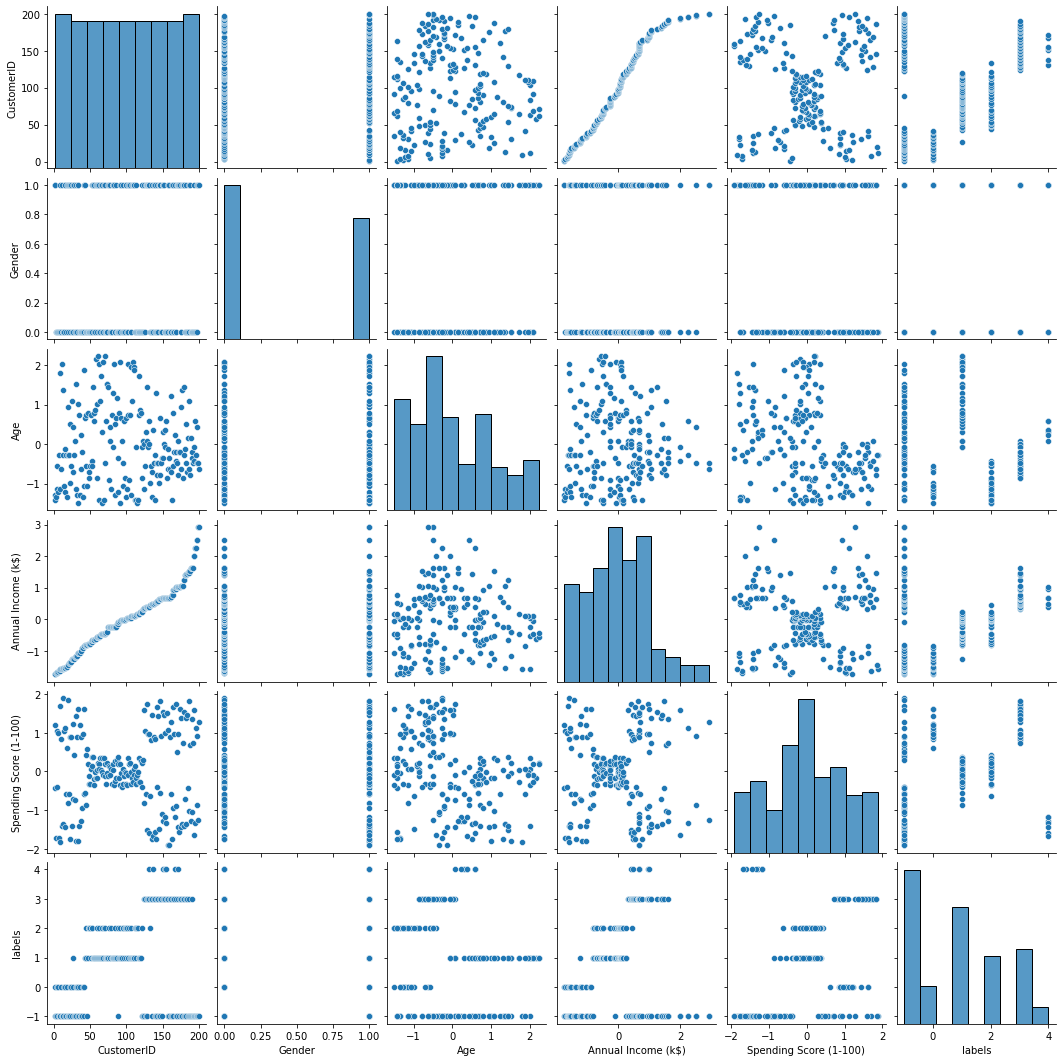

In [264]:
sns.pairplot(df_result_StandScaler)
plt.show()

In [265]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Números de clusters estimados : %d' % n_clusters_)
print('Númedo de outlier/ruído estimado: %d' % n_noise_)
print('Percentual da base foi considerado outlier/ruído: %.1f' % float((n_noise_*100)/df_result_StandScaler.shape[0]))
print('Calinski-Harabasz Index = ',davies_bouldin_score(df_result_StandScaler.iloc[:, 0:5], np.ravel(df_result_StandScaler.iloc[:, 5:])))
print('Davies-Bouldin Inde= ',calinski_harabasz_score(df_result_StandScaler.iloc[:, 0:5], np.ravel(df_result_StandScaler.iloc[:, 5:])))

Números de clusters estimados : 5
Númedo de outlier/ruído estimado: 66
Percentual da base foi considerado outlier/ruído: 33.0
Calinski-Harabasz Index =  6.148249000551978
Davies-Bouldin Inde=  22.55882076147734
